In [21]:
import pandas as pd
import lightgbm as lgb
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as snsimport
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pltimport 
from optuna.visualization import plot_optimization_history
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from optuna.visualization import plot_optimization_history, plot_param_importances

In [2]:
df = pd.read_csv('SINASC_concat_selecionado_limpo.csv', sep=';',)

In [ ]:
df2 = df.sample(frac=0.1, random_state=42).reset_index(drop=True)

In [ ]:


# =====================
# Split
# =====================
X = df2.drop(columns=['APGAR5', 'APGAR1'])
y = df2['APGAR5']

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# =====================
# Objective
# =====================
def objective(trial):
    params = {
        "objective": "regression",
        "metric": "mae",
        "boosting_type": trial.suggest_categorical("boosting_type", ["gbdt", "dart"]),
        "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.05, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 100, 350),
        "min_child_samples": trial.suggest_int("min_child_samples", 20, 80),
        "min_split_gain": trial.suggest_float("min_split_gain", 0.0, 0.5),
        "subsample": trial.suggest_float("subsample", 0.6, 0.9),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 0.9),
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-3, 3.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-3, 3.0, log=True),
        "max_bin": trial.suggest_int("max_bin", 63, 255),
        "extra_trees": trial.suggest_categorical("extra_trees", [True, False]),
        "n_estimators": 5000,
        "random_state": 42,
        "verbosity": -1
    }

    model = lgb.LGBMRegressor(**params)

    model.fit(
        X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        eval_metric="mae",
        callbacks=[lgb.early_stopping(stopping_rounds=100, verbose=False)]
    )

    preds = model.predict(X_valid)
    mae = mean_absolute_error(y_valid, preds)
    return mae

# =====================
# Optimization
# =====================
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100, show_progress_bar=True)

# =====================
# Results
# =====================
print("Best parameters:", study.best_params)
print("Best MAE:", study.best_value)

# =====================
# Plot convergence
# =====================
fig = plot_optimization_history(study)
fig.update_layout(title="Convergência do MAE ao longo dos trials")
fig.show()


[I 2025-11-11 12:03:41,671] A new study created in memory with name: no-name-0d30289d-d4b0-4085-a833-588ffb295c63


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-11-11 12:03:43,025] Trial 0 finished with value: 0.6404147404229682 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.007278433341237479, 'num_leaves': 149, 'min_child_samples': 72, 'min_split_gain': 0.20106136293104887, 'subsample': 0.7652699723610303, 'colsample_bytree': 0.6560064744594456, 'lambda_l1': 1.9606854124478217, 'lambda_l2': 0.3674003589570606, 'max_bin': 162, 'extra_trees': True}. Best is trial 0 with value: 0.6404147404229682.
[I 2025-11-11 12:03:43,983] Trial 1 finished with value: 0.6376248001881685 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.01069350708515768, 'num_leaves': 100, 'min_child_samples': 44, 'min_split_gain': 0.02156217234096819, 'subsample': 0.606783851413601, 'colsample_bytree': 0.689269240600611, 'lambda_l1': 0.0022270232471662777, 'lambda_l2': 1.7507890486642559, 'max_bin': 190, 'extra_trees': True}. Best is trial 1 with value: 0.6376248001881685.
[I 2025-11-11 12:03:44,669] Trial 2 finished with value: 0.64074382670

c:\Users\coimb\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\callback.py:333: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[I 2025-11-11 12:03:50,931] Trial 5 finished with value: 8.930149557037312 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.0234668032827579, 'num_leaves': 287, 'min_child_samples': 80, 'min_split_gain': 0.16483761004927167, 'subsample': 0.634280449196575, 'colsample_bytree': 0.6929268483053622, 'lambda_l1': 0.9479430654105252, 'lambda_l2': 0.003385961695755316, 'max_bin': 163, 'extra_trees': True}. Best is trial 1 with value: 0.6376248001881685.


c:\Users\coimb\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\callback.py:333: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[I 2025-11-11 12:03:57,695] Trial 6 finished with value: 10.346315127047703 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.018640158730257116, 'num_leaves': 316, 'min_child_samples': 31, 'min_split_gain': 0.3879854357593676, 'subsample': 0.7002534325431209, 'colsample_bytree': 0.6570809250605656, 'lambda_l1': 0.169613493866197, 'lambda_l2': 0.04294014127412075, 'max_bin': 98, 'extra_trees': True}. Best is trial 1 with value: 0.6376248001881685.
[I 2025-11-11 12:03:58,081] Trial 7 finished with value: 0.6369158636355262 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.03967810593105566, 'num_leaves': 241, 'min_child_samples': 34, 'min_split_gain': 0.08834410536149534, 'subsample': 0.6918882328840396, 'colsample_bytree': 0.8177587124962304, 'lambda_l1': 0.003778978350633685, 'lambda_l2': 0.0015490572637500766, 'max_bin': 107, 'extra_trees': True}. Best is trial 7 with value: 0.6369158636355262.


c:\Users\coimb\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\callback.py:333: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[I 2025-11-11 12:04:04,674] Trial 8 finished with value: 8.233334484540702 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.0404451198570063, 'num_leaves': 324, 'min_child_samples': 39, 'min_split_gain': 0.22351718874854054, 'subsample': 0.7413900552947543, 'colsample_bytree': 0.7399694463454117, 'lambda_l1': 0.1445621655352143, 'lambda_l2': 0.027555054543021224, 'max_bin': 164, 'extra_trees': True}. Best is trial 7 with value: 0.6369158636355262.
[I 2025-11-11 12:04:05,263] Trial 9 finished with value: 0.6369819153887704 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.018528907070420386, 'num_leaves': 124, 'min_child_samples': 41, 'min_split_gain': 0.051456906270218705, 'subsample': 0.8498199031481958, 'colsample_bytree': 0.845894536019532, 'lambda_l1': 0.004229493959493341, 'lambda_l2': 0.1709564257857501, 'max_bin': 99, 'extra_trees': True}. Best is trial 7 with value: 0.6369158636355262.


c:\Users\coimb\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\callback.py:333: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[I 2025-11-11 12:04:28,663] Trial 10 finished with value: 0.6622730506651326 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.04721034158222753, 'num_leaves': 227, 'min_child_samples': 59, 'min_split_gain': 0.3937749113302228, 'subsample': 0.876434705026611, 'colsample_bytree': 0.8983846899163843, 'lambda_l1': 0.011728284448555528, 'lambda_l2': 0.001094670512556035, 'max_bin': 246, 'extra_trees': False}. Best is trial 7 with value: 0.6369158636355262.
[I 2025-11-11 12:04:29,210] Trial 11 finished with value: 0.6386943556636342 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.029389314790514855, 'num_leaves': 238, 'min_child_samples': 56, 'min_split_gain': 0.10663436669047852, 'subsample': 0.8627441401066691, 'colsample_bytree': 0.8125366730916335, 'lambda_l1': 0.002769045623875678, 'lambda_l2': 0.006105900381988519, 'max_bin': 63, 'extra_trees': True}. Best is trial 7 with value: 0.6369158636355262.
[I 2025-11-11 12:04:30,566] Trial 12 finished with value: 0.638

c:\Users\coimb\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\callback.py:333: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[I 2025-11-11 12:04:48,953] Trial 18 finished with value: 3.265506513820513 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.022235073610721436, 'num_leaves': 207, 'min_child_samples': 21, 'min_split_gain': 0.29933007535426914, 'subsample': 0.7995745072282164, 'colsample_bytree': 0.7801630845260787, 'lambda_l1': 0.003315643703103778, 'lambda_l2': 1.601027130610501, 'max_bin': 79, 'extra_trees': False}. Best is trial 7 with value: 0.6369158636355262.
[I 2025-11-11 12:04:50,130] Trial 19 finished with value: 0.6373153131832867 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.014863479662218003, 'num_leaves': 168, 'min_child_samples': 48, 'min_split_gain': 0.06893050999592787, 'subsample': 0.6682736365055723, 'colsample_bytree': 0.8710586161875424, 'lambda_l1': 0.0011019654244383034, 'lambda_l2': 0.1576957589198416, 'max_bin': 186, 'extra_trees': True}. Best is trial 7 with value: 0.6369158636355262.
[I 2025-11-11 12:04:51,610] Trial 20 finished with value: 0.63744

c:\Users\coimb\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\callback.py:333: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[I 2025-11-11 12:05:53,637] Trial 26 finished with value: 0.6876119002901363 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.021379636025323914, 'num_leaves': 241, 'min_child_samples': 35, 'min_split_gain': 0.03477130411337399, 'subsample': 0.7897124201711981, 'colsample_bytree': 0.8762288106696614, 'lambda_l1': 0.0018622954905624287, 'lambda_l2': 0.31607056789314264, 'max_bin': 82, 'extra_trees': False}. Best is trial 24 with value: 0.6366990774665376.
[I 2025-11-11 12:05:54,376] Trial 27 finished with value: 0.6387368946602965 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.039816522155828815, 'num_leaves': 128, 'min_child_samples': 29, 'min_split_gain': 0.19462018585326238, 'subsample': 0.6921217220871765, 'colsample_bytree': 0.8344954726071236, 'lambda_l1': 0.004233919399640536, 'lambda_l2': 0.03326684873496434, 'max_bin': 148, 'extra_trees': True}. Best is trial 24 with value: 0.6366990774665376.
[I 2025-11-11 12:05:55,715] Trial 28 finished with value: 0

c:\Users\coimb\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\callback.py:333: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[I 2025-11-11 12:06:18,051] Trial 38 finished with value: 10.140249792121402 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.010877205028878971, 'num_leaves': 100, 'min_child_samples': 39, 'min_split_gain': 0.05402148398452791, 'subsample': 0.7081467340313812, 'colsample_bytree': 0.7594719042197937, 'lambda_l1': 2.6550706274569493, 'lambda_l2': 0.0018971002470531473, 'max_bin': 73, 'extra_trees': True}. Best is trial 24 with value: 0.6366990774665376.
[I 2025-11-11 12:06:20,605] Trial 39 finished with value: 0.6410400499500926 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.01604312865498171, 'num_leaves': 275, 'min_child_samples': 32, 'min_split_gain': 0.08128702839310144, 'subsample': 0.73515844986177, 'colsample_bytree': 0.8860898664700061, 'lambda_l1': 0.463347798551039, 'lambda_l2': 0.4130500509261988, 'max_bin': 158, 'extra_trees': False}. Best is trial 24 with value: 0.6366990774665376.


c:\Users\coimb\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\callback.py:333: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[I 2025-11-11 12:06:40,904] Trial 40 finished with value: 9.938701110308378 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.04376091767834908, 'num_leaves': 239, 'min_child_samples': 74, 'min_split_gain': 0.20142488098060762, 'subsample': 0.8642936779501815, 'colsample_bytree': 0.8230789976370705, 'lambda_l1': 0.014507551552144737, 'lambda_l2': 0.06959793589896998, 'max_bin': 91, 'extra_trees': True}. Best is trial 24 with value: 0.6366990774665376.
[I 2025-11-11 12:06:42,239] Trial 41 finished with value: 0.6378742125668092 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.018811266053804045, 'num_leaves': 253, 'min_child_samples': 45, 'min_split_gain': 0.032561006717363214, 'subsample': 0.8309309351529286, 'colsample_bytree': 0.8214304420663066, 'lambda_l1': 0.03929749656201943, 'lambda_l2': 1.272479157112279, 'max_bin': 91, 'extra_trees': True}. Best is trial 24 with value: 0.6366990774665376.
[I 2025-11-11 12:06:43,721] Trial 42 finished with value: 0.637644

c:\Users\coimb\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\callback.py:333: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[I 2025-11-11 12:09:15,997] Trial 48 finished with value: 0.6713110862331977 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.013674670299350369, 'num_leaves': 212, 'min_child_samples': 36, 'min_split_gain': 0.147299433876824, 'subsample': 0.8179648019401216, 'colsample_bytree': 0.8900991265981537, 'lambda_l1': 0.00820994483294753, 'lambda_l2': 0.016507144775399725, 'max_bin': 86, 'extra_trees': False}. Best is trial 24 with value: 0.6366990774665376.
[I 2025-11-11 12:09:18,988] Trial 49 finished with value: 0.6391380071139026 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.011328455526815401, 'num_leaves': 284, 'min_child_samples': 58, 'min_split_gain': 0.49401178005110563, 'subsample': 0.7632378966317288, 'colsample_bytree': 0.7325328327205199, 'lambda_l1': 0.2374323204056712, 'lambda_l2': 0.0056676949708360045, 'max_bin': 122, 'extra_trees': True}. Best is trial 24 with value: 0.6366990774665376.
[I 2025-11-11 12:09:21,758] Trial 50 finished with value: 0.63

c:\Users\coimb\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\callback.py:333: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[I 2025-11-11 12:11:07,025] Trial 58 finished with value: 0.6602917958382412 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.022460875752917674, 'num_leaves': 220, 'min_child_samples': 52, 'min_split_gain': 0.1889434843364784, 'subsample': 0.8833469969728057, 'colsample_bytree': 0.7962681124848953, 'lambda_l1': 0.006049588722039665, 'lambda_l2': 0.198153483677604, 'max_bin': 137, 'extra_trees': False}. Best is trial 51 with value: 0.6366158936426688.
[I 2025-11-11 12:11:09,142] Trial 59 finished with value: 0.6382145238469638 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.015294987579149842, 'num_leaves': 142, 'min_child_samples': 23, 'min_split_gain': 0.07455222718195414, 'subsample': 0.6728539998960605, 'colsample_bytree': 0.8635967367646571, 'lambda_l1': 0.003454083977858042, 'lambda_l2': 0.088753917707874, 'max_bin': 174, 'extra_trees': True}. Best is trial 51 with value: 0.6366158936426688.
[I 2025-11-11 12:11:11,915] Trial 60 finished with value: 0.6380

c:\Users\coimb\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\callback.py:333: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[I 2025-11-11 12:11:44,399] Trial 75 finished with value: 8.579862262950998 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.03681690473665159, 'num_leaves': 168, 'min_child_samples': 34, 'min_split_gain': 0.0776777304525732, 'subsample': 0.6810257445167155, 'colsample_bytree': 0.7874900141264952, 'lambda_l1': 0.0027693284325191977, 'lambda_l2': 2.9063273157368843, 'max_bin': 89, 'extra_trees': True}. Best is trial 51 with value: 0.6366158936426688.
[I 2025-11-11 12:11:45,242] Trial 76 finished with value: 0.6370332424122763 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.045553868526961895, 'num_leaves': 209, 'min_child_samples': 41, 'min_split_gain': 0.08666045663324048, 'subsample': 0.6526620898198768, 'colsample_bytree': 0.8778326233852964, 'lambda_l1': 0.027764116759853134, 'lambda_l2': 0.6734752246430372, 'max_bin': 107, 'extra_trees': True}. Best is trial 51 with value: 0.6366158936426688.
[I 2025-11-11 12:11:46,741] Trial 77 finished with value: 0.63837

c:\Users\coimb\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\callback.py:333: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[I 2025-11-11 12:12:23,952] Trial 87 finished with value: 6.674632360961332 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.04578538217599919, 'num_leaves': 238, 'min_child_samples': 35, 'min_split_gain': 0.061168696860228196, 'subsample': 0.8743368359343311, 'colsample_bytree': 0.8557171965221726, 'lambda_l1': 0.010915254765121271, 'lambda_l2': 0.001385888957350631, 'max_bin': 156, 'extra_trees': True}. Best is trial 81 with value: 0.6364757000797922.
[I 2025-11-11 12:12:25,019] Trial 88 finished with value: 0.6380774217357974 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.030279829737561666, 'num_leaves': 269, 'min_child_samples': 53, 'min_split_gain': 0.13409201485585887, 'subsample': 0.8201984035627641, 'colsample_bytree': 0.6718406143612141, 'lambda_l1': 0.009058820998353593, 'lambda_l2': 0.004418779031229473, 'max_bin': 110, 'extra_trees': True}. Best is trial 81 with value: 0.6364757000797922.
[I 2025-11-11 12:12:25,700] Trial 89 finished with value: 0

c:\Users\coimb\AppData\Local\Programs\Python\Python310\lib\site-packages\kaleido\_sync_server.py:11: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




In [12]:
best_params = study.best_params
best_model = lgb.LGBMRegressor(**best_params)
best_model.fit(X, y)

LGBMRegressor(colsample_bytree=0.868525374162666, extra_trees=True,
              lambda_l1=0.065048572495972, lambda_l2=0.004048258541762598,
              learning_rate=0.04550463108328594, max_bin=143,
              min_child_samples=47, min_split_gain=0.09560137919863347,
              num_leaves=118, subsample=0.7538180495503572)

In [ ]:


# =====================
# Histórico de convergência
# =====================
fig1 = plot_optimization_history(study)
fig1.update_layout(
    title="Convergência do MAE ao longo dos Trials",
    xaxis_title="Número do Trial",
    yaxis_title="Mean Absolute Error (MAE)"
)
fig1.show()

# =====================
# Importância dos hiperparâmetros
# =====================
fig2 = plot_param_importances(study)
fig2.update_layout(
    title="Importância dos Hiperparâmetros na Otimização",
    xaxis_title="Impacto relativo no MAE",
    yaxis_title="Hiperparâmetro"
)
fig2.show()

# =====================
# Distribuição dos resultados
# =====================
results = pd.DataFrame({
    'trial': [t.number for t in study.trials],
    'mae': [t.value for t in study.trials]
})

fig3 = px.box(results, y='mae', points="all",
              title="Distribuição do MAE entre os Trials")
fig3.update_yaxes(title="Mean Absolute Error (MAE)")
fig3.show()


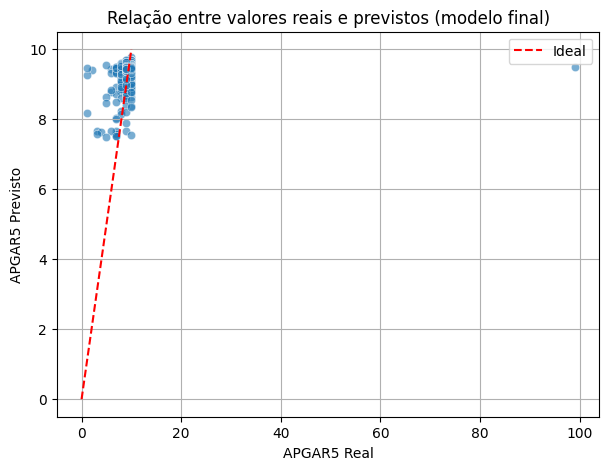

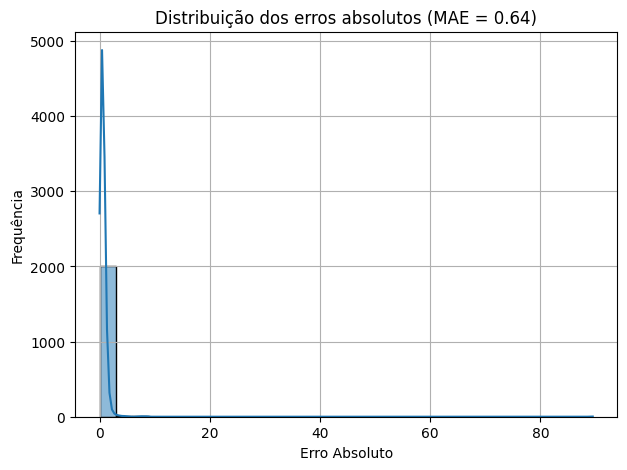

c:\Users\coimb\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:253: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



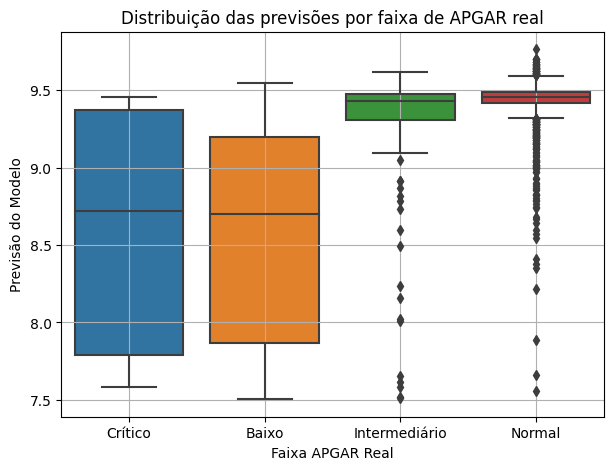

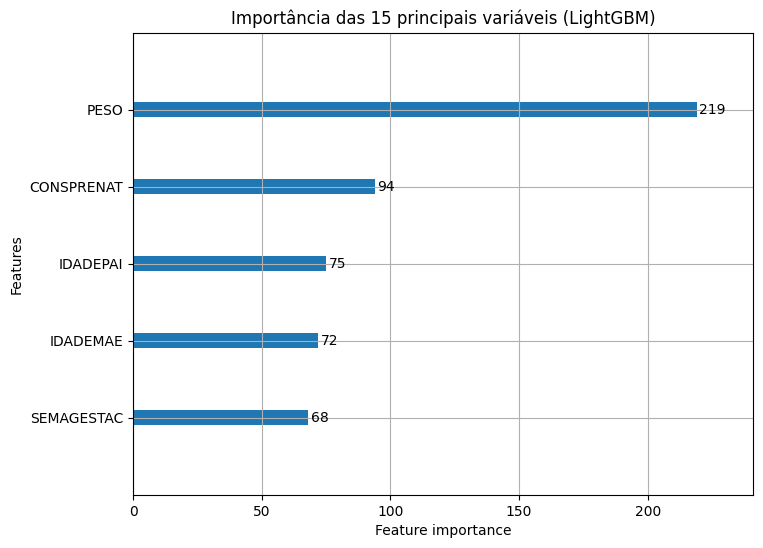

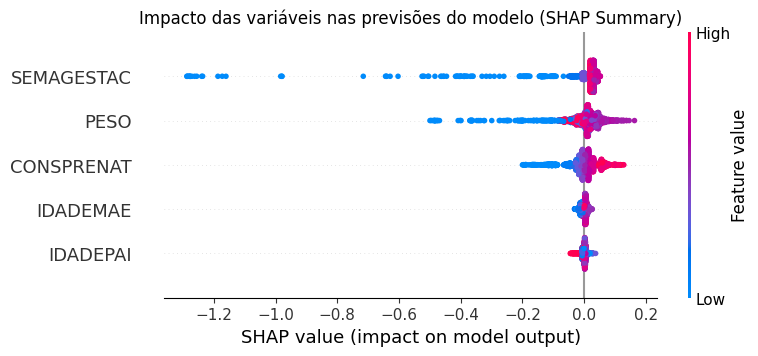

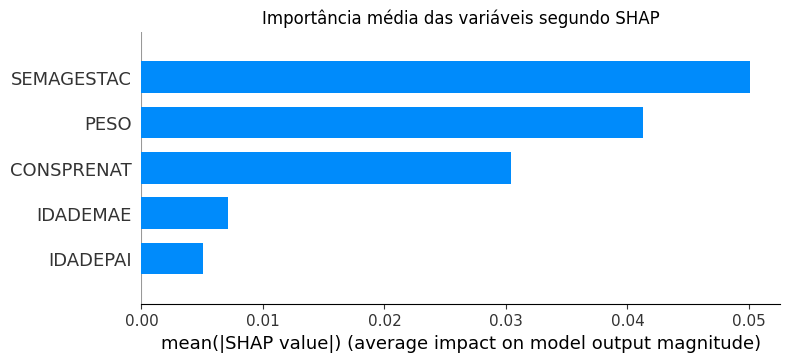

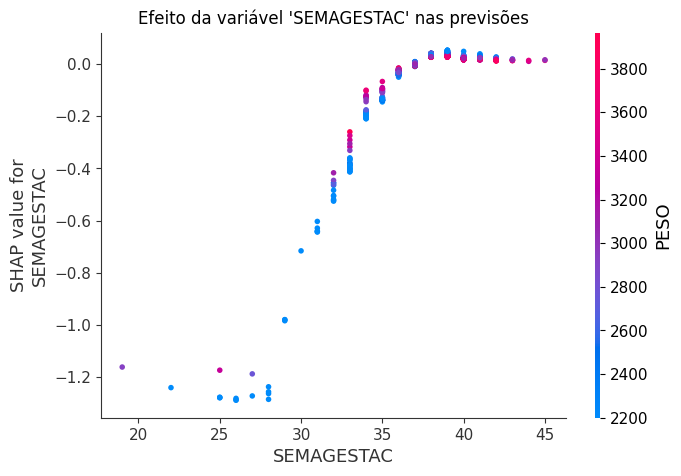

In [ ]:


# =====================
# Previsões e erros
# =====================
y_pred = best_model.predict(X_valid)
mae = mean_absolute_error(y_valid, y_pred)

# 1. Dispersão entre valores reais e previstos
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_valid, y=y_pred, alpha=0.6)
plt.plot([0,10], [0,10], 'r--', label='Ideal')
plt.xlabel("APGAR5 Real")
plt.ylabel("APGAR5 Previsto")
plt.title("Relação entre valores reais e previstos (modelo final)")
plt.legend()
plt.grid(True)
plt.show()

# 2. Distribuição dos erros absolutos
errors = np.abs(y_valid - y_pred)
plt.figure(figsize=(7,5))
sns.histplot(errors, bins=30, kde=True)
plt.xlabel("Erro Absoluto")
plt.ylabel("Frequência")
plt.title(f"Distribuição dos erros absolutos (MAE = {mae:.2f})")
plt.grid(True)
plt.show()

# 3. Comparação média por faixa de APGAR real
df_eval = pd.DataFrame({
    "APGAR_real": y_valid,
    "APGAR_pred": y_pred
})
df_eval["faixa"] = pd.cut(
    df_eval["APGAR_real"],
    bins=[0,3,6,8,10],
    labels=["Crítico", "Baixo", "Intermediário", "Normal"]
)

plt.figure(figsize=(7,5))
sns.boxplot(x="faixa", y="APGAR_pred", data=df_eval)
plt.title("Distribuição das previsões por faixa de APGAR real")
plt.xlabel("Faixa APGAR Real")
plt.ylabel("Previsão do Modelo")
plt.grid(True)
plt.show()

# =====================
# Importância de features (LightGBM)
# =====================
lgb.plot_importance(best_model, max_num_features=15, figsize=(8,6))
plt.title("Importância das 15 principais variáveis (LightGBM)")
plt.show()

# =====================
# SHAP Values
# =====================
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_valid)

# 1. Summary Plot
shap.summary_plot(shap_values, X_valid, plot_type="dot", show=False)
plt.title("Impacto das variáveis nas previsões do modelo (SHAP Summary)")
plt.show()

# 2. Feature Importance baseada em SHAP
shap.summary_plot(shap_values, X_valid, plot_type="bar", show=False)
plt.title("Importância média das variáveis segundo SHAP")
plt.show()

# 3. Dependência de uma feature chave
top_feature = np.abs(shap_values).mean(0).argmax()
shap.dependence_plot(X_valid.columns[top_feature], shap_values, X_valid, show=False)
plt.title(f"Efeito da variável '{X_valid.columns[top_feature]}' nas previsões")
plt.show()
